In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from data import *
from features import *
from stats import *
from preprocess import *
from step import Step
import numpy as np
import matplotlib.pyplot as plt

In [8]:
step = Step(load_mnm_feature)
step = Step(gt_n_trials, step, n=8)
step = Step(subset, step, key='monkey', value='ELV')
step = Step(subset, step, key='subregion', value='MD')
step = Step(subset, step, key='phase', value='POST')
step = Step(win_cts_by_trial, step, win_start=0, win_end=2000, win_size=1000, win_stride=1000)
step = Step(win_cts_by_win, step)
step = Step(t_btw_wins, step, alpha = 0.01)
step = Step(select, step)
step = Step(win_cts_by_trial, step, win_start=1500, win_end=6000, win_size=500, win_stride=500)
step = Step(win_cts_by_win, step)
stats_step = step = Step(stat_tests, step, opposite=True)
step = Step(min_stdevs, step, min=1.1)
step = Step(reduce_index, step, levels=['cell', 'position'])
step = Step(select, step)
step = Step(win_cts_by_trial, step, win_start=500, win_end=6000, win_size=200, win_stride=20)
step = Step(win_cts_by_win, step)

In [9]:
stats = stats_step()['stats_by_cell_win']
stats[stats.anova_p < 0.0001]

/Users/jason/mambaforge/envs/nda2/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


TypeError: Cannot index by location index with a non-integer key

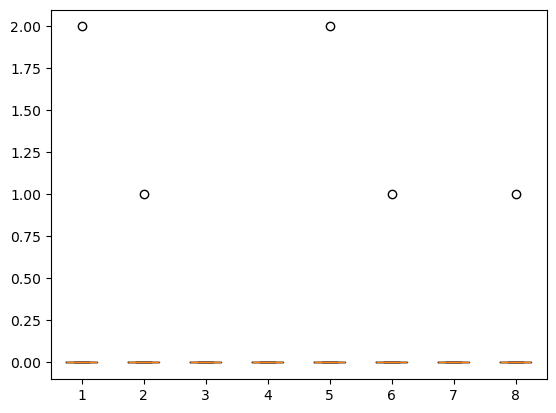

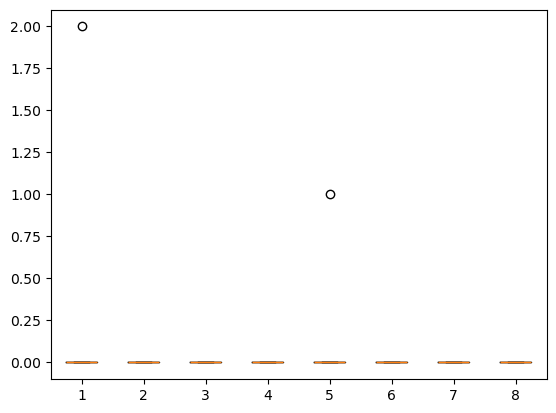

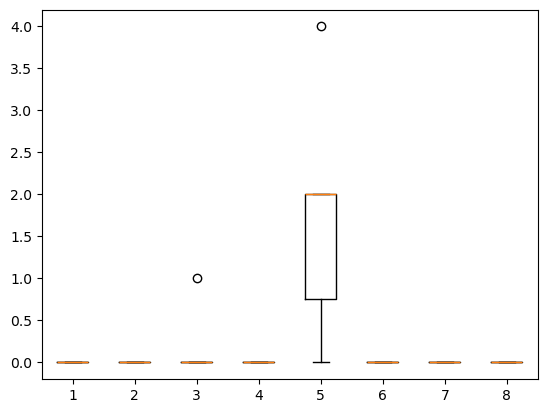

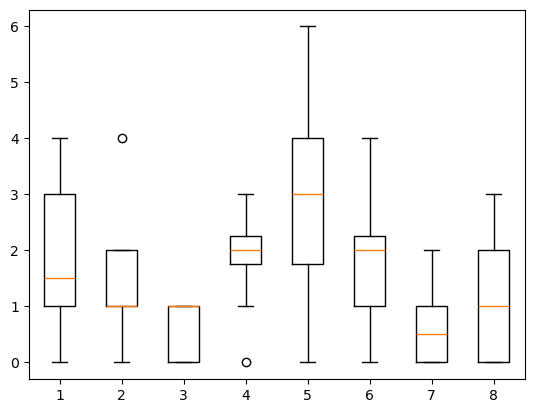

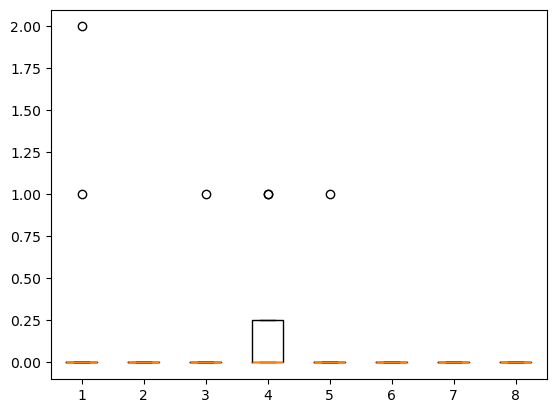

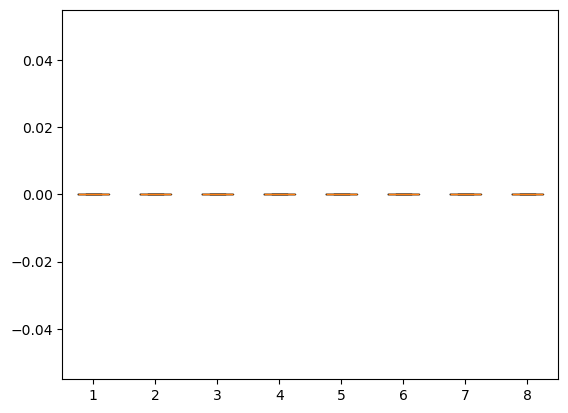

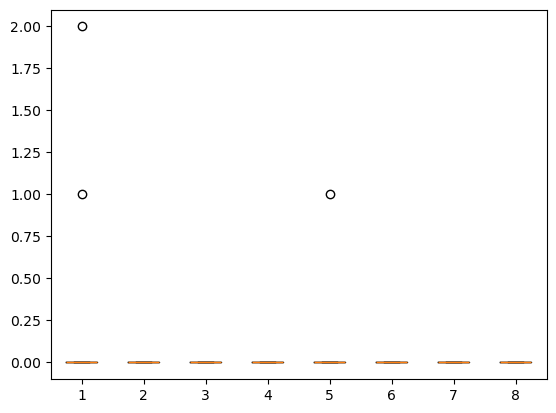

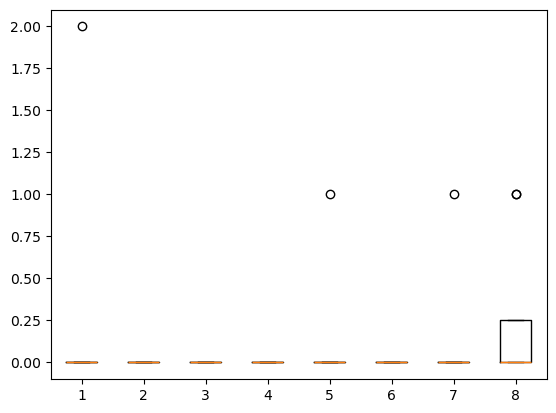

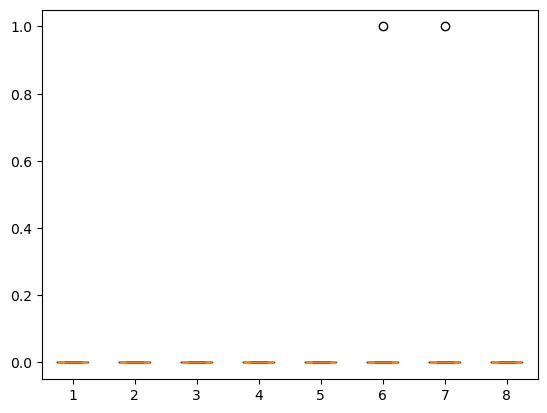

In [16]:
for i in range(9):
    plt.boxplot(stats_step()['win_cts_by_win'].loc['ELV-PFC-MD-POST-1761', :, i])
    plt.show()

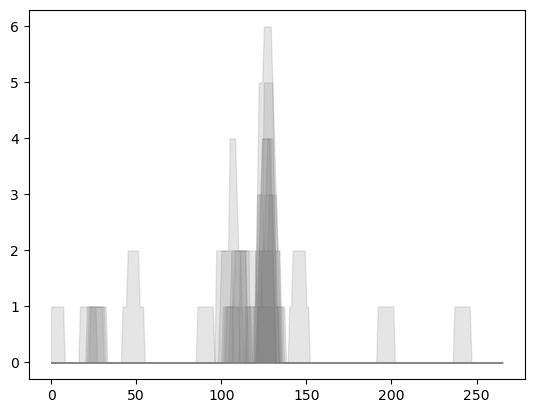

In [40]:
w = step()['win_cts_by_trial'].loc['ELV-PFC-MD-POST-1761'].win_cts
for i in range(12):
    plt.fill_between(np.arange(0, len(w.iloc[i])), [0] * len(w.iloc[i]), w.iloc[i], alpha=0.2, color='gray')

In [40]:
step()['idx']

MultiIndex([('ELV-PFC-MD-POST-1603', 4),
            ('ELV-PFC-MD-POST-1627', 7),
            ('ELV-PFC-MD-POST-1719', 1),
            ('ELV-PFC-MD-POST-1761', 4),
            ('ELV-PFC-MD-POST-1762', 4),
            ('ELV-PFC-MD-POST-1805', 4),
            ('ELV-PFC-MD-POST-1892', 2),
            ('ELV-PFC-MD-POST-1910', 1),
            ('ELV-PFC-MD-POST-1941', 5),
            ('ELV-PFC-MD-POST-1954', 5),
            ('ELV-PFC-MD-POST-2023', 1)],
           names=['cell', 'position'])

In [4]:
cts = np.stack(step()['win_cts_by_trial'].win_cts.array)
cts

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

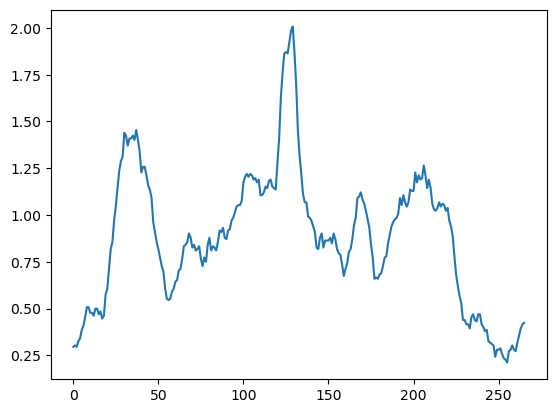

In [5]:
plt.plot(np.mean(cts, axis=0))

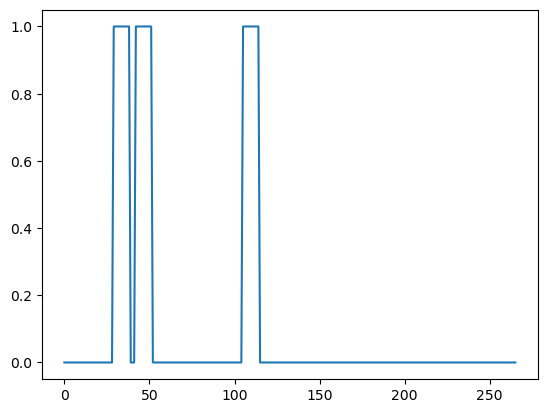

In [38]:
plt.plot(cts[6])

In [6]:
# plt.scatter(np.tile(np.arange(cts.shape[1]), cts.shape[0]), cts.flatten(), s=1, alpha=0.1)

In [7]:
from pygam import LinearGAM, s, f

x = np.tile(np.arange(cts.shape[1]), cts.shape[0])
y = cts.flatten()

In [8]:
# from pygam import LinearGAM
# from pygam.datasets import mcycle
# import matplotlib.pyplot as plt

# X, y = mcycle(return_X_y=True)

# gam = LinearGAM(n_splines=25).gridsearch(X, y)
# XX = gam.generate_X_grid(term=0, n=500)

# plt.plot(XX, gam.predict(XX), 'r--')
# plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')

# plt.scatter(X, y, facecolor='gray', edgecolors='none')
# plt.title('95% prediction interval');

In [9]:
# from pygam import ExpectileGAM
# from pygam.datasets import mcycle

# X, y = mcycle(return_X_y=True)

# # lets fit the mean model first by CV
# gam50 = ExpectileGAM(expectile=0.5).gridsearch(X, y)

# # and copy the smoothing to the other models
# lam = gam50.lam

# # now fit a few more models
# # gam95 = ExpectileGAM(expectile=0.99, lam=lam).fit(X, y)
# # gam05 = ExpectileGAM(expectile=0.01, lam=lam).fit(X, y)
# gam95 = ExpectileGAM(expectile=0.99).fit_quantile(X, y, quantile=0.95)
# gam05 = ExpectileGAM(expectile=0.01).fit_quantile(X, y, quantile=0.05)

# from matplotlib import pyplot as plt

# XX = gam50.generate_X_grid(term=0, n=500)

# plt.scatter(X, y, c='k', alpha=0.2)
# plt.plot(XX, gam50.predict(XX), label='0.5')
# plt.plot(XX, gam95.predict(XX), label='0.99')
# plt.plot(XX, gam05.predict(XX), label='0.01')
# plt.legend()

In [10]:
# ylow = gam05.predict(X)
# yhigh = gam95.predict(X)

# ((ylow <= y) & (y <= yhigh)).sum() / len(y)

In [11]:
# y50 = gam50.predict(X)

# (y < y50).sum() / len(y)

In [13]:
x.shape, y.shape

((35112,), (35112,))

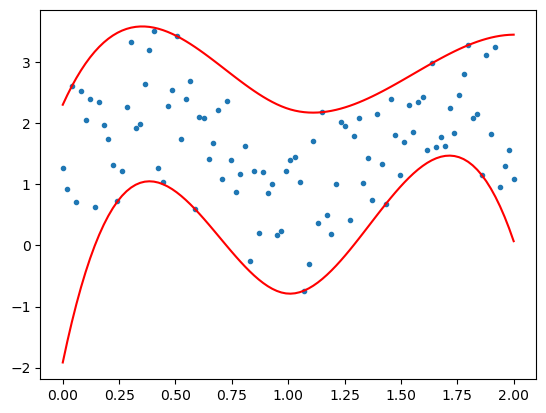

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf


# x = np.linspace(0, 2, 100)
# y = np.sqrt(x) * np.sin(1.5 * np.pi * x) + 3 * np.random.random_sample(100)

mod = smf.quantreg('y ~ bs(x, df=4)', dict(x=x, y=y))

plt.plot(x, y, '.')
reshigh = mod.fit(q=0.975)
# print(reshigh.summary())
plt.plot(x, reshigh.predict(), 'r')
reslow = mod.fit(q=0.025)
plt.plot(x, reslow.predict(), 'r')
plt.show()

In [3]:
# what percent of the data is between the 5th and 95th quantiles?
ylow = reslow.predict()
yhigh = reshigh.predict()

# margin = .0000001
# n_outside = ((ylow > y + margin) | (y > yhigh + margin)).sum()

In [4]:
desired = round(0.05 * len(y))
low = 0.0
high = 1.0
for i in range(100):
    margin = (low + high) / 2
    n_outside = ((ylow > y + margin) | (y > yhigh + margin)).sum()
    if i % 10 == 0:
        print(low, margin, high, n_outside, n_outside / len(y))
    if n_outside == desired:
        break
    elif n_outside > desired:
        low = margin
    else:
        high = margin

0.0 0.5 1.0 0 0.0
0.0 0.00048828125 0.0009765625 0 0.0
0.0 4.76837158203125e-07 9.5367431640625e-07 5 0.05


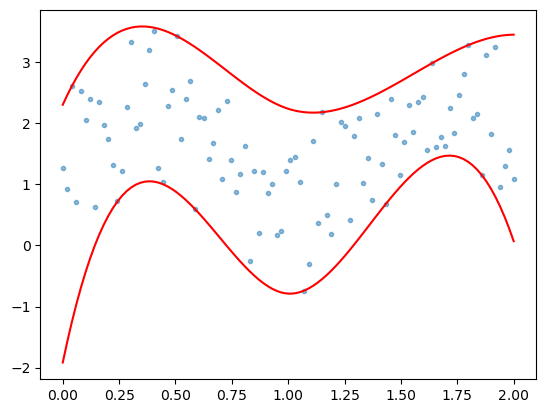

In [5]:
plt.plot(x, y, '.', alpha=0.5)
reshigh = mod.fit(q=0.975)
plt.plot(x, reshigh.predict() + margin, 'r')
reslow = mod.fit(q=0.025)
plt.plot(x, reslow.predict() - margin, 'r')
plt.show()